In [187]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
import json
import datetime

In [188]:
# Read each file
crime_2018_p1 = "Resources/Police_Incidents_2018.csv"
crime_2018_p2 = "Resources/Police_Incidents_2018_PIMS.csv"
crime_2019 = "Resources/Police_Incidents_2019.csv"

In [189]:
# Push each file into a DataFrame
crime_2018_p1_df = pd.read_csv(crime_2018_p1, encoding="ISO-8859-1")
crime_2018_p2_df = pd.read_csv(crime_2018_p2, encoding="ISO-8859-1")
crime_2019_df = pd.read_csv(crime_2019, encoding="ISO-8859-1")

# Merge all into one
crimes = [crime_2018_p1_df, crime_2018_p2_df, crime_2019_df]
crime_df = pd.concat(crimes)

# Cleanup column names
crime_df = crime_df.rename(columns={"ï»¿caseNumber":"CaseNumber","reportedDate":"ReportedDate",
                                   "offense":"Offense","description":"Description"})
crime_df.head(5)

,CaseNumber,ReportedDate,Offense,Description
0,MP 2017 491339,2018-01-01T00:26:00.000Z,AUTOTH,Motor Vehicle Theft
1,MP 2017 491448,2018-01-01T00:38:00.000Z,ROBPAG,Robbery Per Agg
2,MP 2017 491390,2018-01-01T01:02:00.000Z,AUTOTH,Motor Vehicle Theft
3,MP 2018 000140,2018-01-01T02:05:00.000Z,ASLT3,Aslt-sgnfcnt Bdly Hm
4,MP 2018 000199,2018-01-01T02:20:00.000Z,ROBPER,Robbery Of Person


In [190]:
# Verify data
#crime_df.count()

crime_df['ReportedDate'] = pd.to_datetime(crime_df['ReportedDate'])
crime_df['ReportedYearMonth'] = pd.DatetimeIndex(crime_df['ReportedDate']).to_period('M')

crime_df.count()

C:\Users\Joe\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


CaseNumber           48155
ReportedDate         48155
Offense              48155
Description          48155
ReportedYearMonth    48155
dtype: int64

In [192]:
# Now do some grouping, counts
crime_counts = crime_df["ReportedYearMonth"].value_counts()
crime_counts

2019-07    2325
2019-08    2320
2019-09    2248
2019-06    2239
2019-10    2103
2019-05    2012
2019-11    1972
2020-01    1882
2018-10    1857
2019-12    1838
2018-07    1816
2020-03    1791
2018-09    1787
2018-08    1751
2019-04    1715
2018-05    1674
2018-11    1628
2020-02    1613
2019-01    1503
2018-12    1490
2018-01    1482
2018-06    1462
2019-03    1457
2018-03    1405
2018-04    1326
2018-02    1276
2019-02    1251
2020-04     932
Freq: M, Name: ReportedYearMonth, dtype: int64

In [193]:
# Remove 2020-04, since it's a partial month
crime_df = crime_df.loc[crime_df["ReportedYearMonth"] != "2020-04"]
crime_df.count()

CaseNumber           47223
ReportedDate         47223
Offense              47223
Description          47223
ReportedYearMonth    47223
dtype: int64

In [194]:
crime_counts = crime_df["ReportedYearMonth"].value_counts()
type(crime_counts)

pandas.core.series.Series

In [195]:
monthly_crime_df = pd.DataFrame(crime_counts)
monthly_crime_df.reset_index(inplace=True)
monthly_crime_df = monthly_crime_df.sort_values("index", ascending=True)
monthly_crime_df = monthly_crime_df.rename(columns={"index":"Month","ReportedYearMonth":"CrimeCount"})

monthly_crime_df.set_index("Month", inplace=True)
monthly_crime_df


,CrimeCount
Month,
2018-01,1482
2018-02,1276
2018-03,1405
2018-04,1326
2018-05,1674
2018-06,1462
2018-07,1816
2018-08,1751
2018-09,1787


In [196]:
# monthly_crime_df Month CrimeCount
#monthly_crime_df
#monthly_crime_df["Month"] = monthly_crime_df.to_string["Month"]
#monthly_crime_df.dtypes
#print (monthly_crime_df.index)
#months = monthly_crime_df['Month'].values.tolist()
#months

#print(monthly_crime_df.index)
monthly_crime_df.index=monthly_crime_df.index.to_series().astype(str)
#print(monthly_crime_df.index)
monthly_crime_df.reset_index(inplace=True)
#monthly_crime_df["Month"] = monthly_crime_df.to_string["Month"]
monthly_crime_df.dtypes

Month         object
CrimeCount     int64
dtype: object

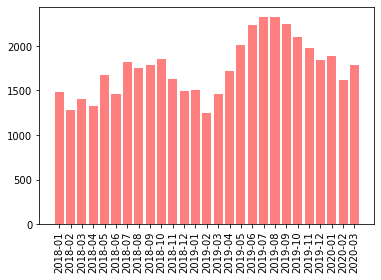

In [206]:
months = monthly_crime_df["Month"].tolist()
crimes = monthly_crime_df["CrimeCount"].tolist()

x_axis = np.arange(len(months))
plt.bar(x_axis, crimes, color='r', alpha=0.5, align="center");
tick_locations = [month for month in x_axis]
plt.xticks(tick_locations, months, rotation=90);